<a href="https://colab.research.google.com/github/gawandepranil/INFOTACT/blob/main/ai_powered_task_management_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install faker


In [83]:
!pip install faker

import pandas as pd
from faker import Faker
from random import choice, randint, sample
from datetime import timedelta

fake = Faker()

# Categories
task_types = ['Bug', 'Feature', 'Improvement', 'Code Review', 'Documentation']
status_options = ['To Do', 'In Progress', 'Code Review', 'Done', 'Blocked']
priorities = ['Low', 'Medium', 'High', 'Critical']
teams = ['Backend', 'Frontend', 'DevOps', 'QA', 'Fullstack']
labels = ['AI', 'Authentication', 'API', 'UI', 'DB', 'Integration']

# Task type-based templates
descriptions = {
    'Bug': "Fix a critical issue in the {label} module handled by the {team} team.",
    'Feature': "Develop a new feature for the {label} functionality by the {team} team.",
    'Improvement': "Enhance the performance of the {label} component, managed by the {team} team.",
    'Code Review': "Review recently submitted code for {label} implementation by the {team} team.",
    'Documentation': "Update documentation for the {label} processes maintained by the {team} team."
}

data = []

# Generate 500 tasks
for i in range(1, 501):
    task_type = choice(task_types)
    team = choice(teams)
    label = choice(labels)
    priority = choice(priorities)
    created_date = fake.date_between(start_date='-60d', end_date='-10d')
    deadline = created_date + timedelta(days=randint(3, 15))
    est_hours = randint(2, 40)
    actual_hours = est_hours + randint(-5, 5)

    description = descriptions[task_type].format(label=label, team=team)

    data.append({
        'Task_ID': f'TSK-{i:04}',
        'Task_Description': description,
        'Task_Type': task_type,
        'Created_By': fake.name(),
        'Assigned_To': fake.name(),
        'Created_Date': created_date,
        'Deadline': deadline,
        'Status': choice(status_options),
        'Priority': priority,
        'Estimated_Hours': est_hours,
        'Actual_Hours': max(actual_hours, 1),
        'Team': team,
        'Label': label,
        'Dependencies': ', '.join(sample([f'TSK-{j:04}' for j in range(1, i)], k=randint(0, 3))) if i > 3 else ''
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Export to CSV
df.to_csv("ai_task_management_dataset.csv", index=False)

# Show full descriptions
pd.set_option('display.max_colwidth', None)

# Preview first 5 rows
print(df.head())


    Task_ID  \
0  TSK-0001   
1  TSK-0002   
2  TSK-0003   
3  TSK-0004   
4  TSK-0005   

                                                              Task_Description  \
0  Review recently submitted code for API implementation by the Frontend team.   
1          Fix a critical issue in the AI module handled by the Frontend team.   
2   Review recently submitted code for UI implementation by the Frontend team.   
3          Develop a new feature for the UI functionality by the Backend team.   
4           Fix a critical issue in the AI module handled by the Backend team.   

     Task_Type        Created_By      Assigned_To Created_Date    Deadline  \
0  Code Review       Laura Jones       Jesus Cook   2025-05-27  2025-06-11   
1          Bug    Chelsea Rogers    Ronald Robles   2025-04-16  2025-04-20   
2  Code Review  Samantha Gilbert  Joseph Williams   2025-05-16  2025-05-20   
3      Feature   Christopher Roy      Marie Tyler   2025-04-24  2025-05-01   
4          Bug        Kare

In [72]:
# !pip install faker

# import pandas as pd
# from faker import Faker
# from random import choice, randint, sample
# from datetime import timedelta

# fake = Faker()

# task_types = ['Bug', 'Feature', 'Improvement', 'Code Review', 'Documentation']
# status_options = ['To Do', 'In Progress', 'Code Review', 'Done', 'Blocked']
# priorities = ['Low', 'Medium', 'High', 'Critical']
# teams = ['Backend', 'Frontend', 'DevOps', 'QA', 'Fullstack']
# labels = ['AI', 'Authentication', 'API', 'UI', 'DB', 'Integration']

# data = []

# for i in range(1, 201):  # 200 tasks
#     created_date = fake.date_between(start_date='-60d', end_date='-10d')
#     deadline = created_date + timedelta(days=randint(3, 15))
#     est_hours = randint(2, 40)
#     actual_hours = est_hours + randint(-5, 5)

#     data.append({
#         'Task_ID': f'TSK-{i:04}',
#         'Task_Description': fake.sentence(nb_words=10),
#         'Task_Type': choice(task_types),
#         'Created_By': fake.name(),
#         'Assigned_To': fake.name(),
#         'Created_Date': created_date,
#         'Deadline': deadline,
#         'Status': choice(status_options),
#         'Priority': choice(priorities),
#         'Estimated_Hours': est_hours,
#         'Actual_Hours': max(actual_hours, 1),
#         'Team': choice(teams),
#         'Label': choice(labels),
#         'Dependencies': ', '.join(sample([f'TSK-{j:04}' for j in range(1, i)], k=randint(0, 3))) if i > 3 else ''
#     })

# df = pd.DataFrame(data)

# # Save to CSV
# df.to_csv("ai_task_management_dataset.csv", index=False)

# # Show a preview
# print(df.head())


In [73]:
print(df.describe())
print("**************")
print("total duplicates:",df.duplicated().sum())

       Estimated_Hours  Actual_Hours
count       500.000000    500.000000
mean         20.576000     20.460000
std          11.110135     11.394036
min           2.000000      1.000000
25%          11.000000     10.000000
50%          20.000000     20.000000
75%          30.000000     30.000000
max          40.000000     45.000000
**************
total duplicates: 0


In [74]:
df.info(verbose=True, memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task_ID           500 non-null    object
 1   Task_Description  500 non-null    object
 2   Task_Type         500 non-null    object
 3   Created_By        500 non-null    object
 4   Assigned_To       500 non-null    object
 5   Created_Date      500 non-null    object
 6   Deadline          500 non-null    object
 7   Status            500 non-null    object
 8   Priority          500 non-null    object
 9   Estimated_Hours   500 non-null    int64 
 10  Actual_Hours      500 non-null    int64 
 11  Team              500 non-null    object
 12  Label             500 non-null    object
 13  Dependencies      500 non-null    object
dtypes: int64(2), object(12)
memory usage: 401.2 KB


In [75]:
df.shape


(500, 14)

In [76]:
df.isnull().sum()

,0
Task_ID,0
Task_Description,0
Task_Type,0
Created_By,0
Assigned_To,0
Created_Date,0
Deadline,0
Status,0
Priority,0
Estimated_Hours,0


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
print("*******************")

# Check unique values
print(df['Task_Type'].value_counts())
print("*******************")
print(df['Status'].value_counts())
print("********************")
print(df['Priority'].value_counts())
print("********************")
print(df['Team'].value_counts())


Duplicate rows: 0
*******************
Task_Type
Feature          105
Improvement      103
Bug              103
Code Review      100
Documentation     89
Name: count, dtype: int64
*******************
Status
In Progress    109
To Do          107
Blocked        101
Done            92
Code Review     91
Name: count, dtype: int64
********************
Priority
Critical    139
Medium      128
High        124
Low         109
Name: count, dtype: int64
********************
Team
Frontend     107
Backend      102
QA           102
Fullstack     95
DevOps        94
Name: count, dtype: int64


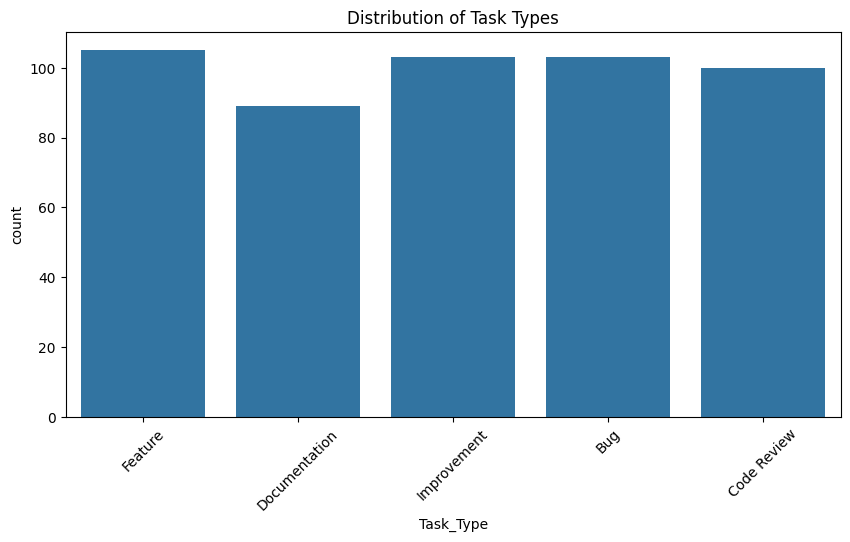

In [78]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Task_Type')
plt.title("Distribution of Task Types")
plt.xticks(rotation=45)
plt.show()

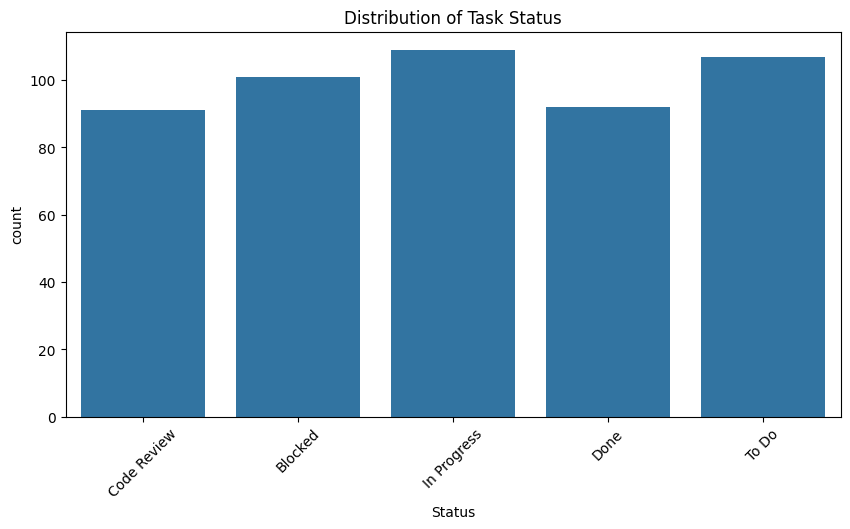

In [79]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Status')
plt.title("Distribution of Task Status")
plt.xticks(rotation=45)
plt.show()

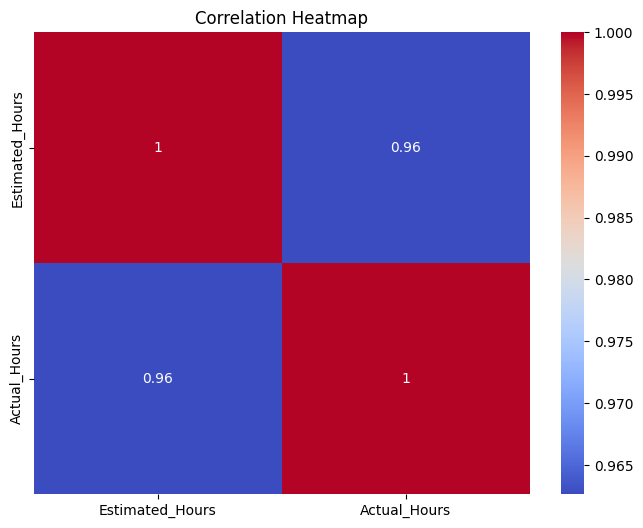

In [80]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Estimated_Hours', 'Actual_Hours']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [81]:
import nltk

# Download both resources properly
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- Explicitly added
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply preprocessing
df['Cleaned_Task_Description'] = df['Task_Description'].apply(preprocess_text)

# Preview cleaned text
print(df[['Task_Description', 'Cleaned_Task_Description']].head())


                                                                          Task_Description  \
0                     Develop a new feature for the DB functionality by the Frontend team.   
1  Update documentation for the Authentication processes maintained by the Fullstack team.   
2                 Enhance the performance of the AI component, managed by the DevOps team.   
3                            Fix a critical issue in the DB module handled by the QA team.   
4                       Develop a new feature for the UI functionality by the DevOps team.   

                                 Cleaned_Task_Description  
0            develop new featur db function frontend team  
1  updat document authent process maintain fullstack team  
2               enhanc perform ai compon manag devop team  
3                  fix critic issu db modul handl qa team  
4               develop new featur ui function devop team  
